In [1]:
import re
import time 
from datetime import date
import pandas as pd
import json
import googlemaps
import pprint
import pandas as pd
import numpy as np
import os
import urllib.request, json
import csv
from tqdm import tqdm_notebook as tqdm
import unidecode
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pwd

'c:\\Users\\usuario\\Documents\\GitHub\\High-School-Access-Peru\\tarea'

In [9]:
print(os.getcwd())

c:\Users\usuario\Documents\GitHub\High-School-Access-Peru\tarea


In [16]:
print(os.getcwd())  # Confirma el directorio actual
print(os.listdir())  # Lista todos los archivos ahí

c:\Users\usuario\Documents\GitHub\High-School-Access-Peru\tarea
['EXCEL', 'requirements.txt', 'Tarea 1.1.ipynb']


In [18]:
print(os.listdir('EXCEL'))

['1.xlsx', '10.xlsx', '11.xlsx', '12.xlsx', '13.xlsx', '14.xlsx', '15.xlsx', '16.xlsx', '17.xlsx', '18.xlsx', '19.xlsx', '2.xlsx', '20.xlsx', '21.xlsx', '22.xlsx', '23.xlsx', '24.xlsx', '25.xlsx', '3.xlsx', '4.xlsx', '5.xlsx', '6.xlsx', '7.xlsx', '8.xlsx', '9.xlsx']


In [ ]:
#pip install openpyxl


  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [21]:
excel_files = ['1.xlsx', '10.xlsx', '11.xlsx', '12.xlsx', '13.xlsx', '14.xlsx', '15.xlsx', '16.xlsx', '17.xlsx', '18.xlsx', '19.xlsx', '2.xlsx', '20.xlsx', '21.xlsx', '22.xlsx', '23.xlsx', '24.xlsx', '25.xlsx', '3.xlsx', '4.xlsx', '5.xlsx', '6.xlsx', '7.xlsx', '8.xlsx', '9.xlsx']

# Carpeta donde están los archivos
folder_path = 'EXCEL'

# Lista para guardar los DataFrames
dfs = []

# Leer cada archivo y agregarlo a la lista
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_excel(file_path)
    dfs.append(df)

# Concatenar todos los DataFrames en uno solo
final_df = pd.concat(dfs, ignore_index=True)

# Ver las primeras filas del DataFrame final
print(final_df.head())

# Opcional: Guardar el DataFrame final en un archivo Excel
final_df.to_excel('archivo_final.xlsx', index=False)

   Código Modular  Anexo     Nombre de SS.EE.  Ubigeo Departamento Provincia  \
0         3947725      0  SEMILLITAS DE JESUS   20101       ANCASH    HUARAZ   
1          723718      0                420-3   20101       ANCASH    HUARAZ   
2         1406321      0        MAGNUS SCHOOL   20101       ANCASH    HUARAZ   
3         1344944      0        MAGNUS SCHOOL   20101       ANCASH    HUARAZ   
4         1310309      0          SANTA ELENA   20101       ANCASH    HUARAZ   

  Distrito  Código DRE/UGEL DRE / UGEL    Centro Poblado  \
0   HUARAZ            20001     HUARAZ    8 DE DICIEMBRE   
1   HUARAZ            20001     HUARAZ  ANTONIO RAIMONDI   
2   HUARAZ            20001     HUARAZ             BELEN   
3   HUARAZ            20001     HUARAZ             BELEN   
4   HUARAZ            20001     HUARAZ             BELEN   

   Código Centro Poblado  Código Local                            Dirección  \
0               655321.0           NaN                       PIEDRAS AZULES   


In [46]:
print(final_df.columns)

Index(['Código Modular', 'Anexo', 'Nombre de SS.EE.', 'Ubigeo', 'Departamento',
       'Provincia', 'Distrito', 'Código DRE/UGEL', 'DRE / UGEL',
       'Centro Poblado', 'Código Centro Poblado', 'Código Local', 'Dirección',
       'Nivel / Modalidad', 'Gestion / Dependencia', 'Latitud', 'Longitud',
       'Altitud', 'Fuente de coordenadas'],
      dtype='object')


In [53]:
final_df

,Código Modular,Anexo,Nombre de SS.EE.,Ubigeo,Departamento,Provincia,Distrito,Código DRE/UGEL,DRE / UGEL,Centro Poblado,Código Centro Poblado,Código Local,Dirección,Nivel / Modalidad,Gestion / Dependencia,Latitud,Longitud,Altitud,Fuente de coordenadas
0,3947725,0,SEMILLITAS DE JESUS,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,8 DE DICIEMBRE,655321.0,NaN,PIEDRAS AZULES,Inicial No Escolarizado,Pública - Sector Educación,-9.531496,-77.537542,3100,MED_REG (LOCAL)
1,723718,0,420-3,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,ANTONIO RAIMONDI,560985.0,15271.0,MALECON SUR Y RIO QUILLCAY,Inicial - Jardín,Pública - Sector Educación,-9.526850,-77.520320,3092,UBICACION_WEB (LOCAL)
2,1406321,0,MAGNUS SCHOOL,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,514962.0,JIRON CARLOS VALENZUELA GUARDIA 983,Primaria,Privada - Particular,-9.532920,-77.526130,3076,UBICACION_WEB (LOCAL)
3,1344944,0,MAGNUS SCHOOL,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,514962.0,JIRON CARLOS VALENZUELA GUARDIA 983,Inicial - Cuna Jardín,Privada - Particular,-9.532920,-77.526130,3076,UBICACION_WEB (LOCAL)
4,1310309,0,SANTA ELENA,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,523278.0,JIRON JUAN DE LA CRUZ ROMERO 1020,Primaria,Privada - Particular,-9.532679,-77.529451,3064,MED_GPS (LOCAL)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114914,1451350,0,32292,101108,HUANUCO,YAROWILCA,CHORAS,100005,YAROWILCA,SAN JOSE DE TASHGA,127943.0,209410.0,TASHGA,Inicial - Jardín,Pública - Sector Educación,-9.891540,-76.581140,3571,UBICACION_WEB (LOCAL)
114915,609768,0,32878,101108,HUANUCO,YAROWILCA,CHORAS,100005,YAROWILCA,SAN JOSE DE YAROWILCA,521029.0,209269.0,SAN JOSE DE YAROWILCA S/N,Primaria,Pública - Sector Educación,-9.897620,-76.559950,3668,UBICACION_WEB (LOCAL)
114916,1593128,0,644,101108,HUANUCO,YAROWILCA,CHORAS,100005,YAROWILCA,SAN JOSE DE YAROWILCA,521029.0,663396.0,SAN JOSE DE YAROWILCA,Inicial - Jardín,Pública - Sector Educación,-9.897030,-76.560070,3664,UBICACION_WEB_MED (LOCAL)
114917,1177161,0,33262,101108,HUANUCO,YAROWILCA,CHORAS,100005,YAROWILCA,SAN JUAN DE RURISH,123285.0,209368.0,SAN JUAN DE RURISH S/N,Primaria,Pública - Sector Educación,-9.923800,-76.622100,3507,GPS_OTRAS_FUENTES (LOCAL)


In [55]:
pip install geopandas matplotlib

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --------------------------- ------------ 11.3/16.2 MB 41.4 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 32.4 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 24.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   ---------------------------- ----------- 4.5/6.3 MB 17.9 MB/s eta 0:00:01
   -------------------------------------- - 6.0/6.3 MB 13.7 MB/s eta 0:00:01
   ---------------------------------------- 6.3/6.3 MB 11.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 1.7/1.7 MB 30.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [56]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Crear geometría de puntos a partir de las coordenadas de latitud y longitud
geometry = [Point(lon, lat) for lon, lat in zip(final_df['Longitud'], final_df['Latitud'])]

# Crear un GeoDataFrame de las escuelas
gdf_escuelas = gpd.GeoDataFrame(final_df, geometry=geometry)

# Asegúrate de que el sistema de coordenadas sea WGS-84 (latitud y longitud)
gdf_escuelas.crs = "EPSG:4326"  # Coordenadas geográficas (latitud/longitud)

# Verifica si se ha creado correctamente el GeoDataFrame
gdf_escuelas.head()



,Código Modular,Anexo,Nombre de SS.EE.,Ubigeo,Departamento,Provincia,Distrito,Código DRE/UGEL,DRE / UGEL,Centro Poblado,Código Centro Poblado,Código Local,Dirección,Nivel / Modalidad,Gestion / Dependencia,Latitud,Longitud,Altitud,Fuente de coordenadas,geometry
0,3947725,0,SEMILLITAS DE JESUS,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,8 DE DICIEMBRE,655321.0,NaN,PIEDRAS AZULES,Inicial No Escolarizado,Pública - Sector Educación,-9.531496,-77.537542,3100,MED_REG (LOCAL),POINT (-77.53754 -9.5315)
1,723718,0,420-3,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,ANTONIO RAIMONDI,560985.0,15271.0,MALECON SUR Y RIO QUILLCAY,Inicial - Jardín,Pública - Sector Educación,-9.526850,-77.520320,3092,UBICACION_WEB (LOCAL),POINT (-77.52032 -9.52685)
2,1406321,0,MAGNUS SCHOOL,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,514962.0,JIRON CARLOS VALENZUELA GUARDIA 983,Primaria,Privada - Particular,-9.532920,-77.526130,3076,UBICACION_WEB (LOCAL),POINT (-77.52613 -9.53292)
3,1344944,0,MAGNUS SCHOOL,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,514962.0,JIRON CARLOS VALENZUELA GUARDIA 983,Inicial - Cuna Jardín,Privada - Particular,-9.532920,-77.526130,3076,UBICACION_WEB (LOCAL),POINT (-77.52613 -9.53292)
4,1310309,0,SANTA ELENA,20101,ANCASH,HUARAZ,HUARAZ,20001,HUARAZ,BELEN,567167.0,523278.0,JIRON JUAN DE LA CRUZ ROMERO 1020,Primaria,Privada - Particular,-9.532679,-77.529451,3064,MED_GPS (LOCAL),POINT (-77.52945 -9.53268)


In [57]:
# Filtrar por niveles educativos
gdf_inicial = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Inicial', case=False)]
gdf_primaria = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Primaria', case=False)]
gdf_secundaria = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Secundaria', case=False)]


In [58]:
# Contar el número de escuelas por distrito para cada nivel
inicial_por_distrito = gdf_inicial.groupby('Distrito').size()
primaria_por_distrito = gdf_primaria.groupby('Distrito').size()
secundaria_por_distrito = gdf_secundaria.groupby('Distrito').size()

# Convertir los resultados a DataFrame
inicial_df = inicial_por_distrito.reset_index(name="Escuelas Inicial")
primaria_df = primaria_por_distrito.reset_index(name="Escuelas Primaria")
secundaria_df = secundaria_por_distrito.reset_index(name="Escuelas Secundaria")


In [ ]:
# Cargar los distritos de un archivo shapefile
distritos = gpd.read_file("ruta_al_shapefile/DEPARTAMENTOS_DISTRITOS.shp")  # Ajusta la ruta al archivo

# Unir los datos de distritos con los conteos de escuelas
distritos_inicial = distritos.merge(inicial_df, left_on='NOMBRE', right_on='Distrito', how='left').fillna(0)
distritos_primaria = distritos.merge(primaria_df, left_on='NOMBRE', right_on='Distrito', how='left').fillna(0)
distritos_secundaria = distritos.merge(secundaria_df, left_on='NOMBRE', right_on='Distrito', how='left').fillna(0)


In [69]:
maps = gpd.read_file(r'../../Data-Science-Python/_data/shape_file/DISTRITOS.shp')
maps


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [71]:
# Agrupar por distrito y nivel educativo
conteo_escuelas = final_df.groupby(['Distrito', 'Nivel / Modalidad']).size().reset_index(name='Escuelas')

# Verificar los primeros registros
conteo_escuelas.head()



,Distrito,Nivel / Modalidad,Escuelas
0,ABANCAY,Básica Alternativa - Avanzado,6
1,ABANCAY,Básica Alternativa - Inicial e Intermedio,4
2,ABANCAY,Básica Especial - Inicial,3
3,ABANCAY,Básica Especial - PRITE,1
4,ABANCAY,Básica Especial - Primaria,3


In [72]:
# Unir los datos de escuelas con los distritos
distritos_escuelas = maps.merge(conteo_escuelas, left_on='DISTRITO', right_on='Distrito', how='left').fillna(0)

# Verificar los primeros registros
distritos_escuelas.head()


,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry,Distrito,Nivel / Modalidad,Escuelas
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",CODO DEL POZUZO,Básica Alternativa - Avanzado,1.0
1,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",CODO DEL POZUZO,Básica Alternativa - Inicial e Intermedio,1.0
2,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",CODO DEL POZUZO,Inicial - Jardín,18.0
3,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",CODO DEL POZUZO,Inicial No Escolarizado,15.0
4,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...",CODO DEL POZUZO,Primaria,49.0


In [76]:
#import matplotlib.pyplot as plt

# Filtrar para nivel Inicial
#distritos_inicial = distritos_escuelas[distritos_escuelas['Nivel / Modalidad'] == 'Inicial']
#distritos_inicial
# Crear el mapa
#fig, ax = plt.subplots(figsize=(15, 15))
##distritos_inicial.plot(ax=ax, column='Escuelas', legend=True, cmap='coolwarm', edgecolor='black')
#ax.set_title("Distribución de Escuelas Iniciales por Distrito", fontsize=15)
#plt.show()
distritos_escuelas['Nivel / Modalidad'].unique()

array(['Básica Alternativa - Avanzado',
       'Básica Alternativa - Inicial e Intermedio', 'Inicial - Jardín',
       'Inicial No Escolarizado', 'Primaria', 'Secundaria',
       'Básica Especial - Primaria', 'Básica Especial - Inicial',
       'Inicial - Cuna Jardín', 'Instancia de Apoyo',
       'Superior Tecnológica', 'Técnico Productiva - CETPRO',
       'Básica Especial - PRITE', 'Superior Pedagógica',
       'Escuela Superior Pedagógica', 'Superior Formación Artística',
       'Inicial - Cuna', 'Escuela Superior Tecnológica', 0], dtype=object)

In [77]:
import pandas as pd

# Definir palabras clave relacionadas con el nivel inicial
palabras_clave_inicial = ['Inicial', 'Básica Alternativa', 'Básica Especial']

# Filtrar las filas que contienen estas palabras clave en la columna 'Nivel / Modalidad'
distritos_inicial = distritos_escuelas[distritos_escuelas['Nivel / Modalidad'].str.contains('|'.join(palabras_clave_inicial), case=False, na=False)]

# Verificar el número de registros filtrados
print(f"Se han encontrado {len(distritos_inicial)} registros de escuelas de nivel inicial.")



Se han encontrado 6145 registros de escuelas de nivel inicial.


In [78]:
# Contar el número de escuelas por distrito
conteo_escuelas_inicial = distritos_inicial.groupby('Distrito').size().reset_index(name='Escuelas Inicial')

# Verificar los primeros registros
print(conteo_escuelas_inicial.head())


                  Distrito  Escuelas Inicial
0                  ABANCAY                 9
1  ABELARDO PARDO LEZAMETA                 1
2                    ACARI                 3
3                     ACAS                 1
4                    ACCHA                 2


In [80]:
import geopandas as gpd

# Cargar el shapefile de los distritos
distritos_geo = gpd.read_file(r'../../Data-Science-Python/_data/shape_file/DISTRITOS.shp')

# Asegurarse de que ambos DataFrames tengan el mismo CRS
distritos_inicial = distritos_inicial.set_crs(distritos_geo.crs, allow_override=True)

# Realizar la unión espacial
distritos_inicial_geo = distritos_geo.merge(conteo_escuelas_inicial, left_on='DISTRITO', right_on='Distrito', how='left')

# Verificar el resultado
print(distritos_inicial_geo.head())


  IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry                Distrito  \
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...         CODO DEL POZUZO   
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...             TOURNAVISTA   
2  POLYG

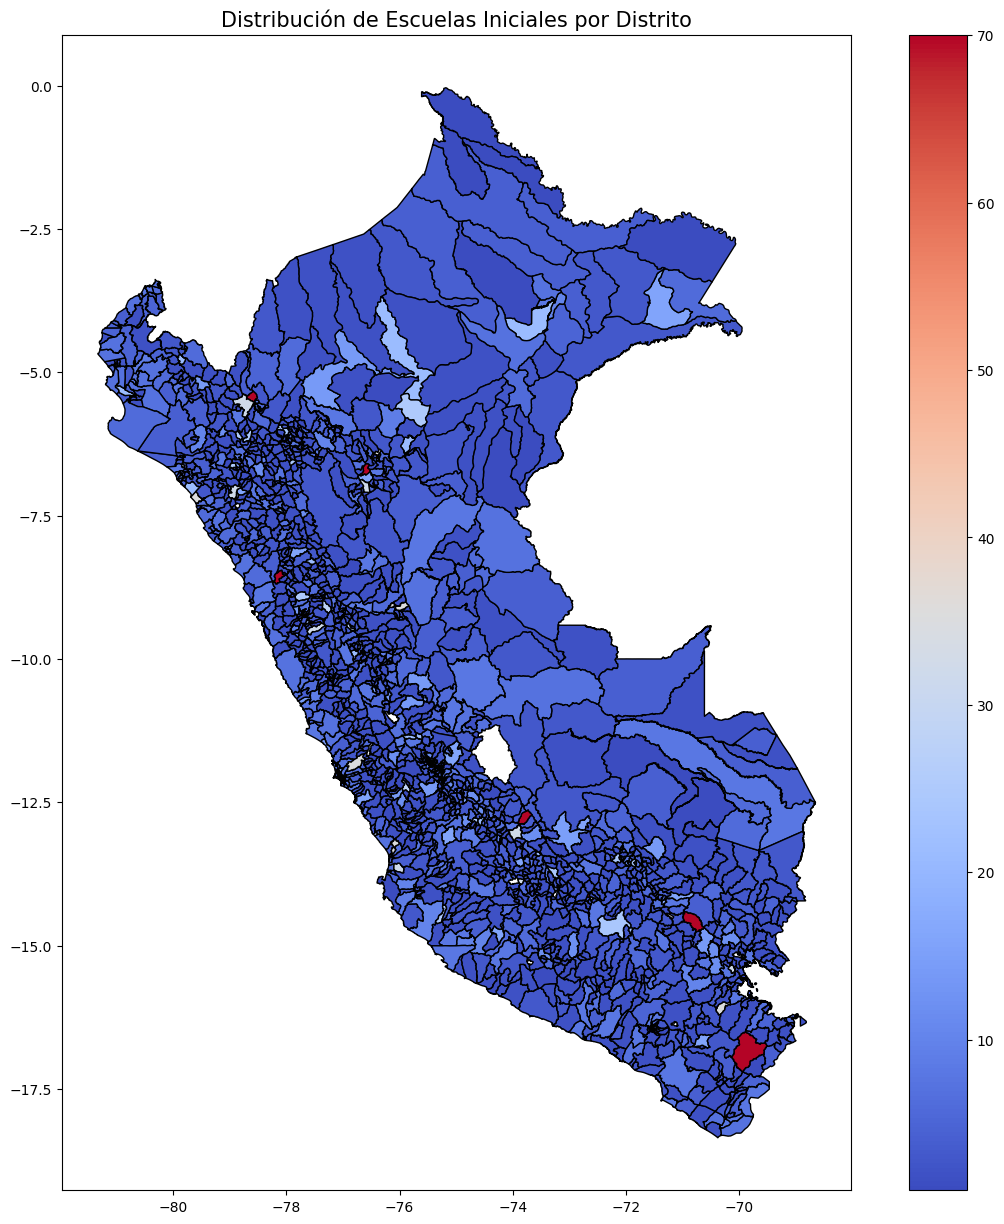

In [81]:
import matplotlib.pyplot as plt

# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 15))
distritos_inicial_geo.plot(ax=ax, column='Escuelas Inicial', legend=True, cmap='coolwarm', edgecolor='black')
ax.set_title("Distribución de Escuelas Iniciales por Distrito", fontsize=15)
plt.show()


## Tarea 1: Mapas estáticos por nivel escolar
Crear 3 mapas estáticos que muestren la distribución de escuelas por distrito:

Uno para Inicial
Uno para Primaria
Uno para Secundaria
Para cada mapa:

Cuente y sume el número total de escuelas por distrito.
Utilice GeoPandas para trazar los resultados.

Paso 1: Filtrar los datos por nivel educativo

In [82]:
import pandas as pd

# Palabras clave para el nivel Inicial
palabras_clave_inicial = ['Inicial', 'Básica Alternativa', 'Básica Especial']

# Filtrar las filas que contienen estas palabras clave en la columna 'Nivel / Modalidad'
distritos_inicial = distritos_escuelas[distritos_escuelas['Nivel / Modalidad'].str.contains('|'.join(palabras_clave_inicial), case=False, na=False)]


In [83]:
# Palabra clave para el nivel Primaria
palabra_clave_primaria = 'Primaria'

# Filtrar las filas que contienen esta palabra clave en la columna 'Nivel / Modalidad'
distritos_primaria = distritos_escuelas[distritos_escuelas['Nivel / Modalidad'].str.contains(palabra_clave_primaria, case=False, na=False)]


In [84]:
# Palabra clave para el nivel Secundaria
palabra_clave_secundaria = 'Secundaria'

# Filtrar las filas que contienen esta palabra clave en la columna 'Nivel / Modalidad'
distritos_secundaria = distritos_escuelas[distritos_escuelas['Nivel / Modalidad'].str.contains(palabra_clave_secundaria, case=False, na=False)]


Paso 2: Contar el número de escuelas por distrito

In [85]:
# Contar el número de escuelas por distrito
conteo_inicial = distritos_inicial.groupby('Distrito').size().reset_index(name='Escuelas Inicial')


In [86]:
# Contar el número de escuelas por distrito
conteo_primaria = distritos_primaria.groupby('Distrito').size().reset_index(name='Escuelas Primaria')


In [87]:
# Contar el número de escuelas por distrito
conteo_secundaria = distritos_secundaria.groupby('Distrito').size().reset_index(name='Escuelas Secundaria')


Paso 3: Cargar el shapefile de los distritos

In [88]:
import geopandas as gpd

# Cargar el shapefile de los distritos
distritos_geo = gpd.read_file(r'../../Data-Science-Python/_data/shape_file/DISTRITOS.shp')


Paso 4: Unir los datos de conteo con los distritos geográficos

In [89]:
# Unir los datos de conteo con los distritos geográficos
distritos_inicial_geo = distritos_geo.merge(conteo_inicial, left_on='DISTRITO', right_on='Distrito', how='left')


In [90]:
# Unir los datos de conteo con los distritos geográficos
distritos_primaria_geo = distritos_geo.merge(conteo_primaria, left_on='DISTRITO', right_on='Distrito', how='left')


In [91]:
# Unir los datos de conteo con los distritos geográficos
distritos_secundaria_geo = distritos_geo.merge(conteo_secundaria, left_on='DISTRITO', right_on='Distrito', how='left')


 Paso 5: Crear los mapas estáticos

In [92]:
import matplotlib.pyplot as plt
import contextily as cx

# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 15))
distritos_inicial_geo.plot(ax=ax, column='Escuelas Inicial', legend=True, cmap='coolwarm', edgecolor='black', legend_kwds={'label': "Número de Escuelas Iniciales"})
ax.set_title("Distribución de Escuelas Iniciales por Distrito", fontsize=15)

# Añadir capa base
cx.add_basemap(ax, crs=distritos_inicial_geo.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Mostrar el mapa
plt.show()


ModuleNotFoundError: No module named 'contextily'

In [ ]:
# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 15))
distritos_primaria_geo.plot(ax=ax, column='Escuelas Primaria', legend=True, cmap='coolwarm', edgecolor='black', legend_kwds={'label': "Número de Escuelas Primarias"})
ax.set_title("Distribución de Escuelas Primarias por Distrito", fontsize=15)

# Añadir capa base
cx.add_basemap(ax, crs=distritos_primaria_geo.crs.to_string(), source=cx.providers.CartoDB.Positron)

# Mostrar el mapa
plt.show()


In [ ]:
# Crear el mapa
fig, ax = plt.subplots(figsize=(15, 15))
distritos_secundaria_geo.plot(ax=ax, column='Escuelas Secundaria', legend=True, cmap='coolwarm', edgecolor='black', legend_kwds={'label': "Número
::contentReference[oaicite:25]{index=25}
 
